In [1]:
!pip install opencv-python

In [2]:
!pip install keras_applications

In [3]:
import pandas as pd
import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt 

import cv2

## Check meta Data

In [4]:
# covid data
covid_imgs = pd.read_csv("C:\IE 7615\Project\Covid_detection_CNN-master\COVID-19_Radiography_Dataset\metadata.csv\metadata.csv")
covid_imgs.head(2)

,Unnamed: 0,file_name,image_data_grayscale,file_format,image_shape,label
0,0,COVID-1.png,[[185 40 0 ... 0 24 131]\n [ 75 14 0 ...,PNG,"(299, 299)",COVID
1,1,COVID-10.png,[[135 133 131 ... 24 21 19]\n [132 130 129 ...,PNG,"(299, 299)",COVID


In [5]:
# opacity data
opacity_images = pd.read_csv("C:\IE 7615\Project\Covid_detection_CNN-master\COVID-19_Radiography_Dataset\metadata.csv\Lung_opacity metadata.csv")
opacity_images.head(2)

,Unnamed: 0,file_name,image_data_grayscale,file_format,image_shape,label
0,3616,Lung_Opacity-1.png,[[ 0 0 0 ... 0 0 0]\n [ 0 0 0 ...,PNG,"(299, 299)",Lung_Opacity
1,3617,Lung_Opacity-10.png,[[ 12 13 13 ... 188 186 168]\n [ 13 14 14 ...,PNG,"(299, 299)",Lung_Opacity


In [6]:
# normal data
normal_images = pd.read_csv("C:\\IE 7615\\Project\\Covid_detection_CNN-master\\COVID-19_Radiography_Dataset\\metadata.csv\\Normal_metadata.csv")
normal_images.head(2)

,Unnamed: 0,file_name,image_data_grayscale,file_format,image_shape,label
0,9628,Normal-1.png,[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,PNG,"(299, 299)",Normal
1,9629,Normal-10.png,[[ 10 9 9 ... 10 9 5]\n [ 10 9 9 ...,PNG,"(299, 299)",Normal


In [7]:
# pneumonia data
pneumonia_images = pd.read_csv("C:\\IE 7615\\Project\\Covid_detection_CNN-master\\COVID-19_Radiography_Dataset\\metadata.csv\\Viral Pneumonia_metadata.csv")
pneumonia_images.head(2)

,Unnamed: 0,file_name,image_data_grayscale,file_format,image_shape,label
0,19820,Viral Pneumonia-1.png,[[ 1 1 2 ... 146 79 62]\n [ 1 1 2 ...,PNG,"(299, 299)",Viral Pneumonia
1,19821,Viral Pneumonia-10.png,[[ 0 3 9 ... 86 89 87]\n [13 19 22 ... 91 92...,PNG,"(299, 299)",Viral Pneumonia


## images preprocessing

In [8]:
# Working with images
old_root_dir = "C:/IE 7615/Project/Covid_detection_CNN-master/COVID-19_Radiography_Dataset/"
imgs = ['COVID','Lung_Opacity','Normal','Viral Pneumonia']
NEW_DIR = "C:/IE 7615/Project/all_image/"

In [9]:
if not os.path.exists(NEW_DIR):
  os.mkdir(NEW_DIR)

  for i in imgs:
    org_dir = os.path.join(old_root_dir, i+"/")
    print(i)
    for imgfile in glob.iglob(os.path.join(org_dir, "*.png")):
      shutil.copy(imgfile, NEW_DIR)
      
else:
  print("Already Exist")


Already Exist


# visualize the number of Images in each categories

In [10]:
# Visualize the number of images in each categories
counter = {'COVID':0,'Lung_Opacity':0,'Normal':0,'Viral Pneumonia':0}
for image in imgs:
  for count in glob.iglob(NEW_DIR+image+"*"):
    counter[image] += 1

counter

{'COVID': 8, 'Lung_Opacity': 6012, 'Normal': 5492, 'Viral Pneumonia': 45}

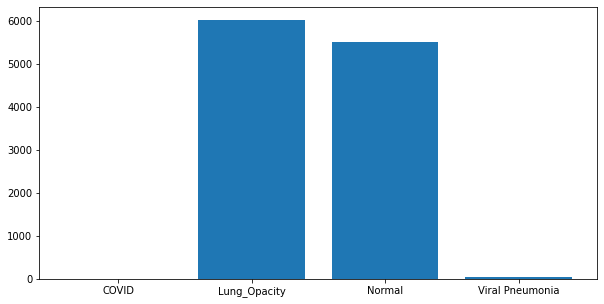

In [11]:
plt.figure(figsize=(10,5))
plt.bar(x = counter.keys(), height= counter.values())
plt.show()

# train test split 

In [12]:
# create new folder storing covid and normal Radiography and split them into train and test and validation dataset
if not os.path.exists(NEW_DIR+"train_test_split/"):

  os.makedirs(NEW_DIR+"train_test_split/")

  os.makedirs(NEW_DIR+"train_test_split/train/Normal")
  os.makedirs(NEW_DIR+"train_test_split/train/Covid")

  os.makedirs(NEW_DIR+"train_test_split/test/Normal")
  os.makedirs(NEW_DIR+"train_test_split/test/Covid")

  os.makedirs(NEW_DIR+"train_test_split/validation/Normal")
  os.makedirs(NEW_DIR+"train_test_split/validation/Covid")


  # Train Data
  for i in np.random.choice(replace= False , size= 3000 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 3900 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 900 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
    os.remove(i)

  # Validation Data
  for i in np.random.choice(replace= False , size= 308 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 500 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 200 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
    os.remove(i)

  # Test Data
  for i in np.random.choice(replace= False , size= 300 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 300 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 200 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
    os.remove(i)

 



In [16]:
train_path  = "C:/IE 7615/Project/all_image/train_test_split/train"
valid_path  = "C:/IE 7615/Project/all_image/train_test_split/validation"
test_path   = "C:/IE 7615/Project/all_image/train_test_split/test"

In [27]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import vgg16
from tensorflow.keras.applications import resnet
from tensorflow.keras.applications import inception_v3
from keras.models import Model
from keras.layers import Dense, MaxPool2D, Conv2D
import keras

In [18]:
# vgg train data
vgg_train_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , rescale= 1./255, zoom_range= 0.2, horizontal_flip= True, shear_range= 0.2)
vgg_train = vgg_train_data_gen.flow_from_directory(directory= train_path , target_size=(224,224))

# vgg val data
vgg_validation_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , rescale= 1./255 )
vgg_valid = vgg_validation_data_gen.flow_from_directory(directory= valid_path , target_size=(224,224))

# vgg test data
vgg_test_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , rescale= 1./255 )
vgg_test = vgg_test_data_gen.flow_from_directory(directory= test_path , target_size=(224,224), shuffle= False)

Found 7800 images belonging to 2 classes.
Found 1008 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [19]:
# resnet train data
resnet_train_data_gen = ImageDataGenerator(dtype = 'float32', preprocessing_function= resnet.preprocess_input)
resnet_train = resnet_train_data_gen.flow_from_directory(directory= train_path , target_size=(224,224))

# resnet val data
resnet_validation_data_gen = ImageDataGenerator(dtype = 'float32', preprocessing_function= resnet.preprocess_input)
resnet_valid = resnet_validation_data_gen.flow_from_directory(directory= valid_path , target_size=(224,224))

# resnet test data
resnet_test_data_gen = ImageDataGenerator(dtype = 'float32', preprocessing_function= resnet.preprocess_input)
resnet_test = resnet_test_data_gen.flow_from_directory(directory= test_path , target_size=(224,224), shuffle= False)

Found 7800 images belonging to 2 classes.
Found 1008 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [20]:
# Inception train data
Inc_train_data_gen = ImageDataGenerator(dtype = 'float32', preprocessing_function= inception_v3.preprocess_input)
Inc_train = Inc_train_data_gen.flow_from_directory(directory= train_path , target_size=(224,224))

# Inception val data
Inc_validation_data_gen = ImageDataGenerator(dtype = 'float32', preprocessing_function= inception_v3.preprocess_input)
Inc_valid = Inc_validation_data_gen.flow_from_directory(directory= valid_path , target_size=(224,224))

# Inception test data
Inc_test_data_gen = ImageDataGenerator(dtype = 'float32', preprocessing_function= inception_v3.preprocess_input)
Inc_test = Inc_test_data_gen.flow_from_directory(directory= test_path , target_size=(224,224), shuffle= False)

Found 7800 images belonging to 2 classes.
Found 1008 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [21]:
class_type = {0:'Covid',  1 : 'Normal'}

In [22]:
t_img , label = vgg_train.next()

In [23]:
def plotImages(img_arr, label):

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


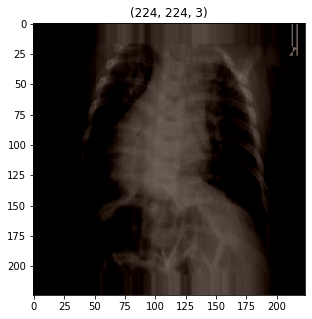

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


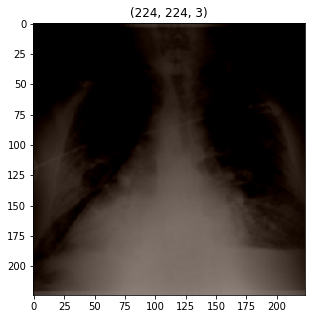

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


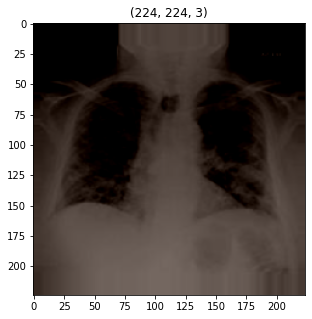

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


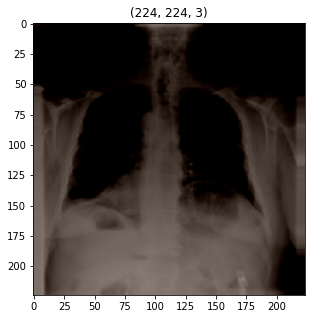

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


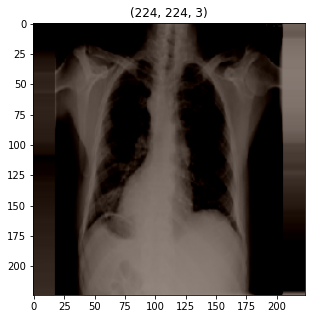

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


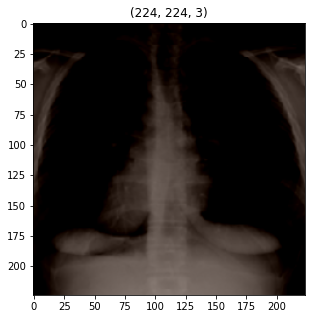

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


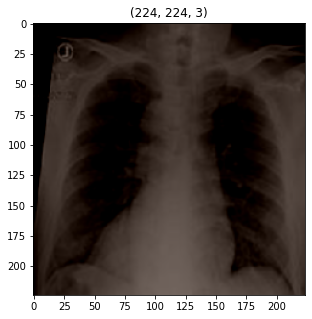

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


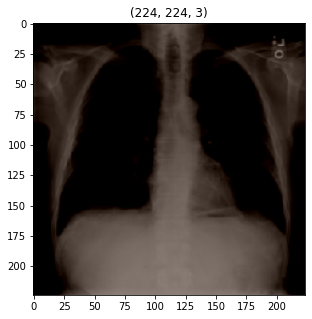

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


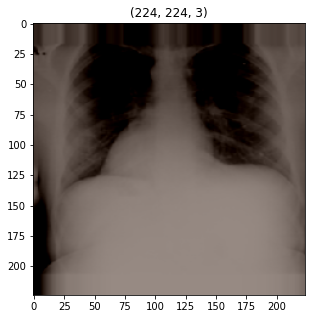

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


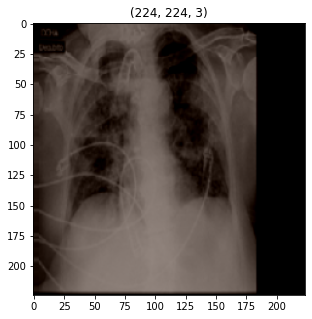

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


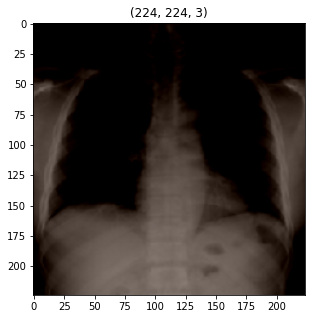

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


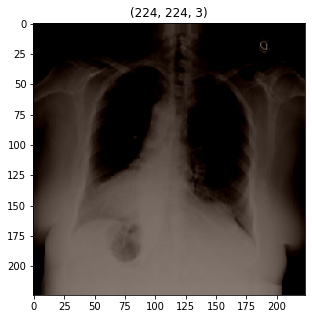

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


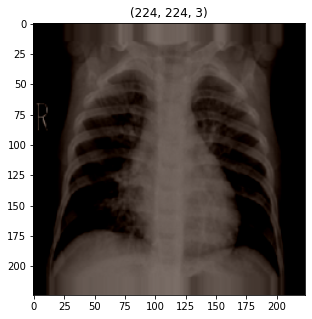

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


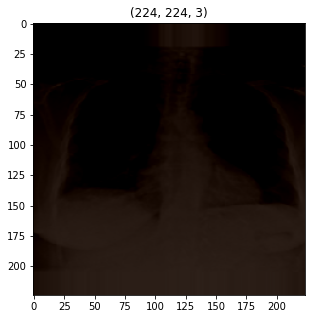

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


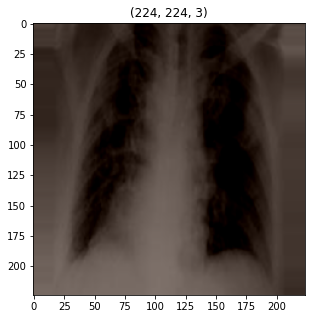

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


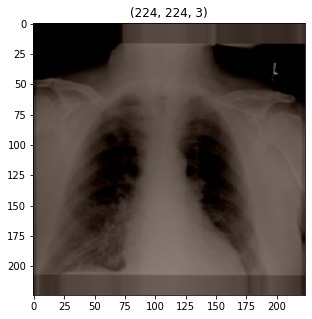

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


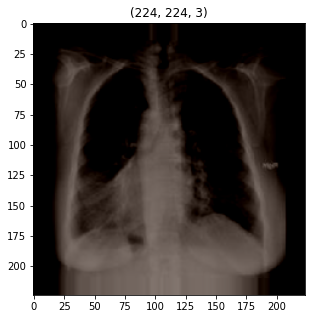

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


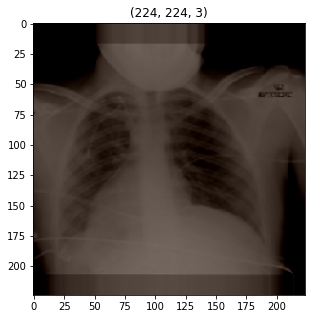

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


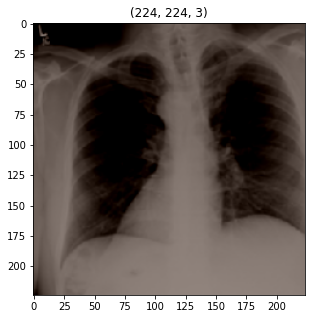

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


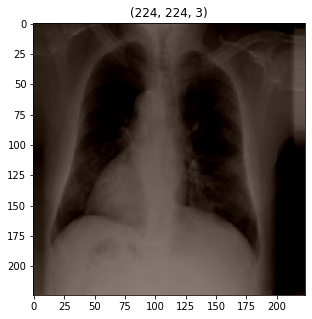

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


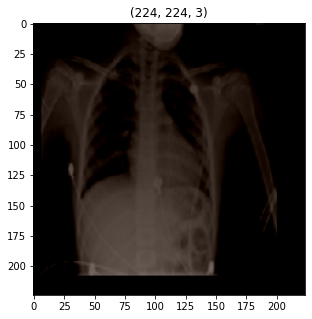

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


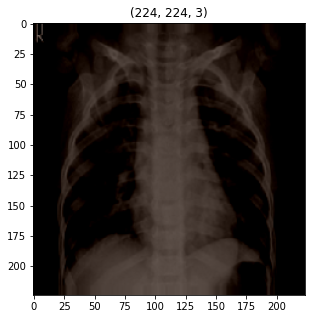

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


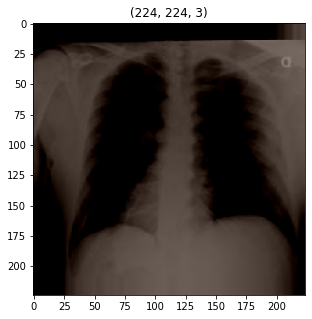

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


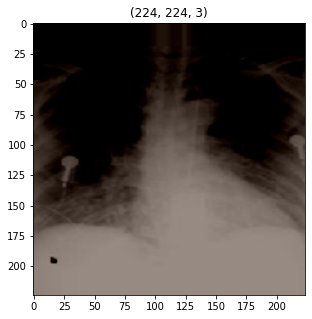

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


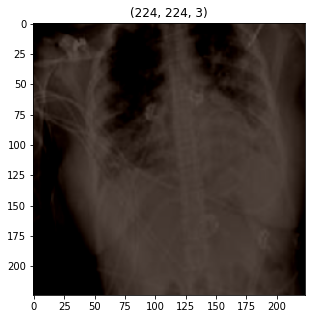

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


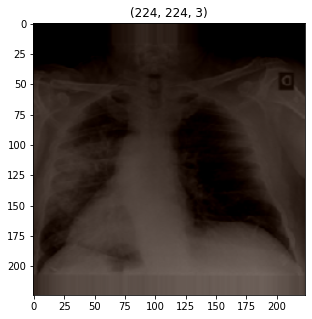

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


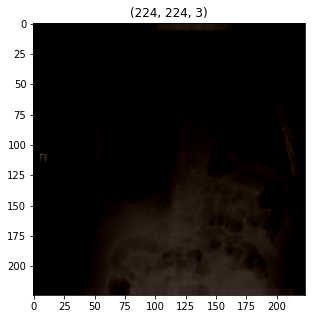

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


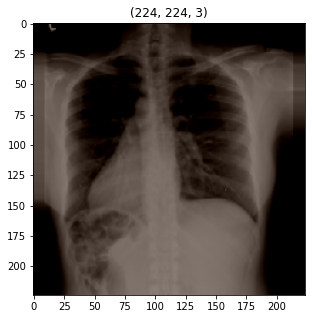

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


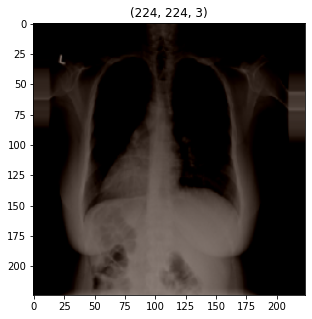

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


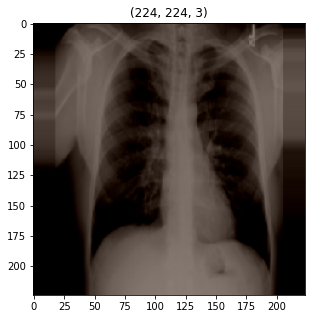

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


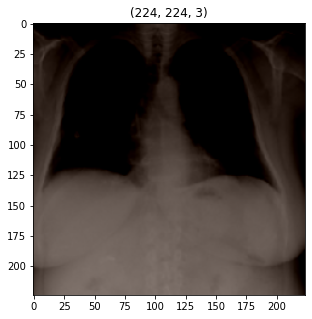

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


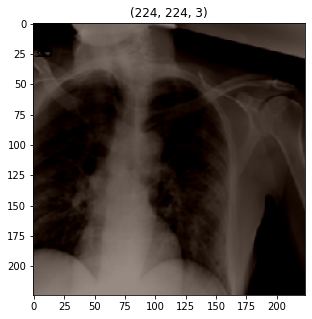

In [24]:
plotImages(t_img, label)


In [32]:
import keras
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import Flatten , Dense, Dropout , MaxPool2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [33]:
# VGG16
vgg = VGG16( input_shape=(224,224,3), include_top= False) # include_top will consider the new weights
# resnet
resnet = ResNet50(weights="imagenet", include_top=False, input_shape=(224,224,3))
# Inception
Inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))

87924736/87910968 [==============================] - 1s 0us/step


In [34]:
for layer in vgg.layers:           # Dont Train the parameters again 
  layer.trainable = False
for layer in resnet.layers:           # Dont Train the parameters again 
  layer.trainable = False
for layer in Inception.layers:           # Dont Train the parameters again 
  layer.trainable = False

In [35]:
# VGG16
x = Flatten()(vgg.output)
#x = Dropout(rate=.25)(x)
#x = Dense(units=64, activation='relu')(x)
#x = Dropout(rate=.25)(x)
x = Dense(units=2 , activation='sigmoid', name = 'predictions' )(x)

vgg_model = Model(vgg.input, x)

In [36]:
# resnet
x = resnet.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(units = 2, activation="sigmoid", name = 'predictions')(x)

resnet_model = Model(inputs = resnet.input, outputs = predictions)

In [37]:
# Inception
x = Inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(2, activation='sigmoid', name = 'predictions')(x)

Inc_model = Model(inputs=Inception.input, outputs=predictions)

In [38]:
# VGG16 summary
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [39]:
# resnet summary
resnet_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_10[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [40]:
# Inception summary
Inc_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [41]:
vgg_model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [42]:
resnet_model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [43]:
Inc_model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

# Training Process

In [44]:
vgg_hist = vgg_model.fit_generator(vgg_train, steps_per_epoch= 10, epochs= 8, validation_data= vgg_valid , validation_steps= 32)

C:\Users\JOHNYU~1\AppData\Local\Temp/ipykernel_21208/3806944101.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  vgg_hist = vgg_model.fit_generator(vgg_train, steps_per_epoch= 10, epochs= 8, validation_data= vgg_valid , validation_steps= 32)


Epoch 1/8
10/10 [==============================] - 191s 21s/step - loss: 0.8253 - accuracy: 0.6406 - val_loss: 0.5481 - val_accuracy: 0.7698
Epoch 2/8
10/10 [==============================] - 192s 21s/step - loss: 0.6379 - accuracy: 0.7188 - val_loss: 0.4216 - val_accuracy: 0.8264
Epoch 3/8
10/10 [==============================] - 190s 21s/step - loss: 0.4887 - accuracy: 0.8125 - val_loss: 0.3625 - val_accuracy: 0.8413
Epoch 4/8
10/10 [==============================] - 192s 21s/step - loss: 0.4031 - accuracy: 0.8094 - val_loss: 0.3737 - val_accuracy: 0.8343
Epoch 5/8
10/10 [==============================] - 191s 21s/step - loss: 0.4031 - accuracy: 0.8219 - val_loss: 0.3213 - val_accuracy: 0.8730
Epoch 6/8
10/10 [==============================] - 192s 21s/step - loss: 0.4314 - accuracy: 0.8062 - val_loss: 0.4875 - val_accuracy: 0.7738
Epoch 7/8
10/10 [==============================] - 196s 21s/step - loss: 0.3705 - accuracy: 0.8219 - val_loss: 0.3177 - val_accuracy: 0.8740
Epoch 8/8
10/

In [45]:
resnet_hist = resnet_model.fit_generator(resnet_train, steps_per_epoch= 10, epochs= 8, validation_data= resnet_valid , validation_steps= 32)

C:\Users\JOHNYU~1\AppData\Local\Temp/ipykernel_21208/530071546.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  resnet_hist = resnet_model.fit_generator(resnet_train, steps_per_epoch= 10, epochs= 8, validation_data= resnet_valid , validation_steps= 32)


Epoch 1/8
10/10 [==============================] - 90s 9s/step - loss: 24.5943 - accuracy: 0.6156 - val_loss: 2.9157 - val_accuracy: 0.8581
Epoch 2/8
10/10 [==============================] - 85s 9s/step - loss: 6.6117 - accuracy: 0.8062 - val_loss: 1.4771 - val_accuracy: 0.9177
Epoch 3/8
10/10 [==============================] - 80s 9s/step - loss: 3.2617 - accuracy: 0.8250 - val_loss: 1.7947 - val_accuracy: 0.8829
Epoch 4/8
10/10 [==============================] - 80s 9s/step - loss: 1.4316 - accuracy: 0.8719 - val_loss: 0.3509 - val_accuracy: 0.9375
Epoch 5/8
10/10 [==============================] - 80s 9s/step - loss: 0.4608 - accuracy: 0.9000 - val_loss: 0.2815 - val_accuracy: 0.9355
Epoch 6/8
10/10 [==============================] - 82s 9s/step - loss: 0.3672 - accuracy: 0.8938 - val_loss: 0.3002 - val_accuracy: 0.9385
Epoch 7/8
10/10 [==============================] - 82s 9s/step - loss: 0.3096 - accuracy: 0.8969 - val_loss: 0.2126 - val_accuracy: 0.9484
Epoch 8/8
10/10 [=========

In [46]:
Inc_hist = Inc_model.fit_generator(Inc_train, steps_per_epoch= 10, epochs= 8, validation_data= Inc_valid , validation_steps= 32)

C:\Users\JOHNYU~1\AppData\Local\Temp/ipykernel_21208/4004650067.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  Inc_hist = Inc_model.fit_generator(Inc_train, steps_per_epoch= 10, epochs= 8, validation_data= Inc_valid , validation_steps= 32)


Epoch 1/8
10/10 [==============================] - 52s 5s/step - loss: 2.2979 - accuracy: 0.4812 - val_loss: 1.4602 - val_accuracy: 0.4960
Epoch 2/8
10/10 [==============================] - 46s 5s/step - loss: 0.9773 - accuracy: 0.5353 - val_loss: 0.6402 - val_accuracy: 0.6329
Epoch 3/8
10/10 [==============================] - 47s 5s/step - loss: 0.5480 - accuracy: 0.7312 - val_loss: 0.5166 - val_accuracy: 0.7569
Epoch 4/8
10/10 [==============================] - 46s 5s/step - loss: 0.4706 - accuracy: 0.7906 - val_loss: 0.5085 - val_accuracy: 0.7599
Epoch 5/8
10/10 [==============================] - 46s 5s/step - loss: 0.4398 - accuracy: 0.7906 - val_loss: 0.4534 - val_accuracy: 0.7877
Epoch 6/8
10/10 [==============================] - 45s 5s/step - loss: 0.4621 - accuracy: 0.8031 - val_loss: 0.4446 - val_accuracy: 0.7798
Epoch 7/8
10/10 [==============================] - 44s 5s/step - loss: 0.4245 - accuracy: 0.7969 - val_loss: 0.4396 - val_accuracy: 0.8075
Epoch 8/8
10/10 [==========

# Model performamce

In [47]:
# vgg
vgg_h = vgg_hist.history
vgg_h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [48]:
# resnet
resnet_h = resnet_hist.history
resnet_h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [49]:
# Inception
Inc_h = Inc_hist.history
Inc_h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

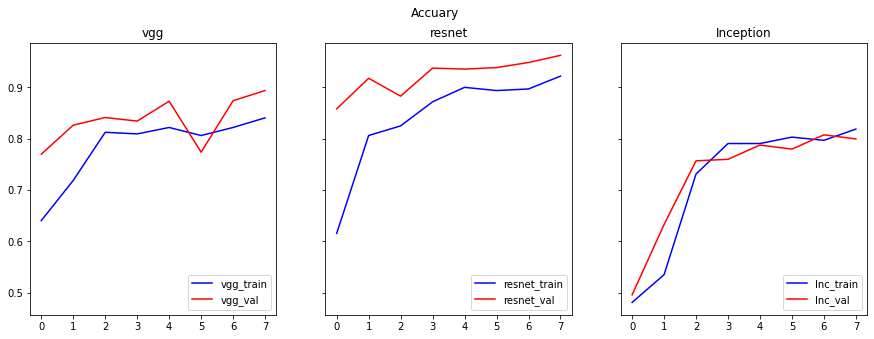

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5), sharey = True)
fig.suptitle('Accuary')
ax1.plot(vgg_h['accuracy'], c='blue', label = 'vgg_train')
ax1.plot(vgg_h['val_accuracy'] , c = "red", label = 'vgg_val')
ax2.plot(resnet_h['accuracy'], c='blue', label = 'resnet_train')
ax2.plot(resnet_h['val_accuracy'], c = "red", label = 'resnet_val')
ax3.plot(Inc_h['accuracy'], c='blue', label = 'Inc_train')
ax3.plot(Inc_h['val_accuracy'], c = "red", label = 'Inc_val')
ax1.title.set_text("vgg")
ax2.title.set_text("resnet")
ax3.title.set_text("Inception")
ax1.legend(loc="lower right")
ax2.legend(loc="lower right")
ax3.legend(loc="lower right")
plt.show()

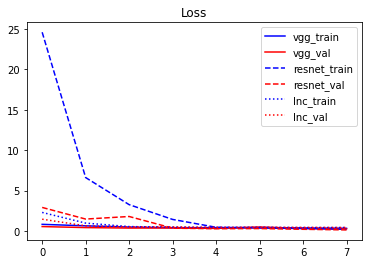

In [51]:
plt.plot(vgg_h['loss'], c='blue', label = 'vgg_train')
plt.plot(vgg_h['val_loss'] , c = "red", label = 'vgg_val')
plt.plot(resnet_h['loss'], c='blue', linestyle = '--', label = 'resnet_train')
plt.plot(resnet_h['val_loss'], linestyle = '--', c = "red", label = 'resnet_val')
plt.plot(Inc_h['loss'], c='blue', linestyle = ':', label = 'Inc_train')
plt.plot(Inc_h['val_loss'], linestyle = ':', c = "red", label = 'Inc_val')
plt.title("Loss")
plt.legend(loc="upper right")
plt.show()

In [52]:
vgg_model.evaluate_generator(generator= vgg_test , verbose=1) # Returns [loss , accuracy]

C:\Users\JOHNYU~1\AppData\Local\Temp/ipykernel_21208/265580602.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  vgg_model.evaluate_generator(generator= vgg_test , verbose=1) # Returns [loss , accuracy]


25/25 [==============================] - 113s 4s/step - loss: 0.3000 - accuracy: 0.9025


[0.3000353276729584, 0.9024999737739563]

In [53]:
resnet_model.evaluate_generator(generator= resnet_test , verbose=1) # Returns [loss , accuracy]

C:\Users\JOHNYU~1\AppData\Local\Temp/ipykernel_21208/1414072780.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  resnet_model.evaluate_generator(generator= resnet_test , verbose=1) # Returns [loss , accuracy]


25/25 [==============================] - 47s 2s/step - loss: 0.1602 - accuracy: 0.9450


[0.16023865342140198, 0.9449999928474426]

In [54]:
Inc_model.evaluate_generator(generator= Inc_test , verbose=1) # Returns [loss , accuracy]

C:\Users\JOHNYU~1\AppData\Local\Temp/ipykernel_21208/3240097718.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  Inc_model.evaluate_generator(generator= Inc_test , verbose=1) # Returns [loss , accuracy]


25/25 [==============================] - 27s 1s/step - loss: 0.4469 - accuracy: 0.7788


[0.4469171166419983, 0.7787500023841858]

In [55]:
from keras.preprocessing import image

def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)/255
  img = np.expand_dims(img , axis= 0 )
  
  return img

In [56]:
path = "C:/IE 7615/Project/all_image/train_test_split/test/Covid/COVID-165.png"

In [57]:
#predictions
img = get_img_array(path)

vgg_res = class_type[np.argmax(vgg_model.predict(img))]
print(vgg_res)

print(f"The chances of image being Covid is : {vgg_model.predict(img)[0][0]*100} percent")
print(f"The chances of image being Normal is : {vgg_model.predict(img)[0][1]*100} percent")

Covid
The chances of image being Covid is : 64.62266445159912 percent
The chances of image being Normal is : 20.76798677444458 percent


In [58]:
#predictions
img = get_img_array(path)

resnet_res = class_type[np.argmax(resnet_model.predict(img))]
print(resnet_res)

print(f"The chances of image being Covid is : {resnet_model.predict(img)[0][0]*100} percent")
print(f"The chances of image being Normal is : {resnet_model.predict(img)[0][1]*100} percent")

Covid
The chances of image being Covid is : 94.17915940284729 percent
The chances of image being Normal is : 20.51371932029724 percent


In [59]:
#predictions
img = get_img_array(path)

Inc_res = class_type[np.argmax(Inc_model.predict(img))]
print(Inc_res)

print(f"The chances of image being Covid is : {Inc_model.predict(img)[0][0]*100} percent")
print(f"The chances of image being Normal is : {Inc_model.predict(img)[0][1]*100} percent")

Covid
The chances of image being Covid is : 69.99164819717407 percent
The chances of image being Normal is : 51.29391551017761 percent


In [60]:
path_delta = "C:/IE 7615/Project/Delta Variant/1638755207.jpg"

In [61]:
#predictions
img = get_img_array(path_delta)

vgg_res = class_type[np.argmax(vgg_model.predict(img))]
print(vgg_res)

print(f"The chances of image being Covid is : {vgg_model.predict(img)[0][0]*100} percent")
print(f"The chances of image being Normal is : {vgg_model.predict(img)[0][1]*100} percent")

Covid
The chances of image being Covid is : 79.10464406013489 percent
The chances of image being Normal is : 22.61694073677063 percent


In [62]:
#predictions
img = get_img_array(path_delta)

resnet_res = class_type[np.argmax(resnet_model.predict(img))]
print(resnet_res)

print(f"The chances of image being Covid is : {resnet_model.predict(img)[0][0]*100} percent")
print(f"The chances of image being Normal is : {resnet_model.predict(img)[0][1]*100} percent")

Covid
The chances of image being Covid is : 95.23797035217285 percent
The chances of image being Normal is : 9.606027603149414 percent


In [63]:
#predictions
img = get_img_array(path_delta)

Inc_res = class_type[np.argmax(Inc_model.predict(img))]
print(Inc_res)

print(f"The chances of image being Covid is : {Inc_model.predict(img)[0][0]*100} percent")
print(f"The chances of image being Normal is : {Inc_model.predict(img)[0][1]*100} percent")

Covid
The chances of image being Covid is : 83.30746293067932 percent
The chances of image being Normal is : 37.862685322761536 percent
